## Q.2 

In [27]:
from __future__ import division
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Data Preprocessing

In [28]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)
print('train images shape:', train_images.shape)
print('train labels shape:', train_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

train images shape: (50000, 32, 32, 3)
train labels shape: (50000, 10)
test images shape: (10000, 32, 32, 3)
test labels shape: (10000, 10)


## Data Normalization

In [29]:
train_images = train_images.astype(np.float32)
mean = np.mean(train_images)
std = np.std(train_images)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

In [30]:
if len(train_labels.shape)==1:
    train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
    test_labels = keras.utils.to_categorical(test_labels, num_classes=10)
# print(train_labels.shape, test_labels.shape) 
# print(train_labels[0:3])
# print('Old labels: {}'.format(np.argmax(train_labels[:3], axis=1)))

result = np.empty((3, 4), dtype=float)

## Multilayer Perceptron

In [49]:
# define the model type (still empty)
mlp = keras.models.Sequential()
# add a layer that just flattens the input (no weights here)
mlp.add(Flatten(input_shape=(32, 32, 3)))
# add the first hidden layer with 64 neurons, an activation function of sigmoid, and an input size of 784
mlp.add(Dense(512, activation='sigmoid', input_shape=(3072,)))
# add the second hidden layer with 64 neurons and sigmoid activation function
mlp.add(Dense(512, activation='sigmoid'))
# add the output layer with 10 units and Softmax activation function
mlp.add(Dense(10, activation='softmax'))

In [50]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Randomly sample 20% of the training set
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, train_size=0.2) 
mlp_h = mlp.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(test_images, test_labels), verbose=1)
result[0, 0] = mlp_h.history['accuracy'][-1]
result[0, 1] = mlp_h.history['val_accuracy'][-1]

# evalute test accuracy 
mlp_test = mlp.evaluate(test_images,test_labels, verbose=1)
result[0, 2] = mlp_test[0]
result[0, 3] = mlp_test[1]

Epoch 1/5
313/313 [==============================] - 7s 20ms/step - loss: 1.9011 - accuracy: 0.3210 - val_loss: 1.8159 - val_accuracy: 0.3667
Epoch 2/5
313/313 [==============================] - 6s 19ms/step - loss: 1.6930 - accuracy: 0.4020 - val_loss: 1.7204 - val_accuracy: 0.3932
Epoch 3/5
313/313 [==============================] - 6s 20ms/step - loss: 1.5865 - accuracy: 0.4410 - val_loss: 1.6940 - val_accuracy: 0.4004
Epoch 4/5
313/313 [==============================] - 6s 20ms/step - loss: 1.4942 - accuracy: 0.4827 - val_loss: 1.6626 - val_accuracy: 0.4166
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.6722 - accuracy: 0.4098


## CNN1

In [51]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(10, activation='softmax'))

In [52]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Randomly sample 20% of the training set
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, train_size=0.2) 
cnn_h = cnn.fit(x_train.reshape(-1, 32, 32, 3), 
        y_train, 
        batch_size=32, 
        epochs=5,
        validation_data=(test_images.reshape(-1, 32, 32, 3), test_labels),
        verbose=1)
result[1, 0] = cnn_h.history['accuracy'][-1]
result[1, 1] = cnn_h.history['val_accuracy'][-1]

# evalute test accuracy 
cnn_test = cnn.evaluate(test_images.reshape(-1, 32, 32, 3), test_labels)
result[1, 2] = cnn_test[0]
result[1, 3] = cnn_test[1]

Epoch 1/5
313/313 [==============================] - 98s 310ms/step - loss: 1.6751 - accuracy: 0.3894 - val_loss: 1.4280 - val_accuracy: 0.4888
Epoch 2/5
313/313 [==============================] - 97s 309ms/step - loss: 1.1765 - accuracy: 0.5817 - val_loss: 1.3226 - val_accuracy: 0.5263
Epoch 3/5
313/313 [==============================] - 97s 311ms/step - loss: 0.6827 - accuracy: 0.7666 - val_loss: 1.3553 - val_accuracy: 0.5463
Epoch 4/5
313/313 [==============================] - 97s 311ms/step - loss: 0.2135 - accuracy: 0.9423 - val_loss: 1.4616 - val_accuracy: 0.5778
Epoch 5/5
313/313 [==============================] - 7s 23ms/step - loss: 1.5138 - accuracy: 0.5924


## CNN2

In [53]:
cnn2 = Sequential()
cnn2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'
, input_shape=(32, 32, 3)))
cnn2.add(MaxPool2D())
cnn2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn2.add(MaxPool2D())
cnn2.add(Flatten())
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(10, activation='softmax'))

In [54]:
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Randomly sample 20% of the training set
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, train_size=0.2) 
cnn2_h = cnn2.fit(x_train.reshape(-1, 32, 32, 3), 
        y_train, 
        batch_size=32, 
        epochs=5,
        validation_data=(test_images.reshape(-1, 32, 32, 3), test_labels),
        verbose=1)
result[2, 0] = cnn2_h.history['accuracy'][-1]
result[2, 1] = cnn2_h.history['val_accuracy'][-1]

# evalute test accuracy 
cnn2_test = cnn2.evaluate(test_images.reshape(-1, 32, 32, 3),test_labels)
result[2, 2] = cnn2_test[0]
result[2, 3] = cnn2_test[1]

Epoch 1/5
313/313 [==============================] - 18s 54ms/step - loss: 1.7539 - accuracy: 0.3548 - val_loss: 1.4044 - val_accuracy: 0.4844
Epoch 2/5
313/313 [==============================] - 17s 53ms/step - loss: 1.3236 - accuracy: 0.5277 - val_loss: 1.2677 - val_accuracy: 0.5428
Epoch 3/5
313/313 [==============================] - 17s 53ms/step - loss: 1.1139 - accuracy: 0.6064 - val_loss: 1.1537 - val_accuracy: 0.5882
Epoch 4/5
313/313 [==============================] - 17s 54ms/step - loss: 0.9357 - accuracy: 0.6653 - val_loss: 1.1154 - val_accuracy: 0.5986
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.1196 - accuracy: 0.6126


## 2.a

From the table below, we can see that in general MLP performs worse than CNN both in terms of the training accuracy and test accuracy. This makes sense because CNNs are primarily used for image recognition tasks by taking advantage of the spatial structure of an image, learning features such as edges, lines, and textures. On the other hand, MLPs are more general purposed  for classification, regression, and other tasks. However, an advantage of MLP is the simple architecture of MLP compared to CNN, we can see that it trains significantly faster than CNN in general. 

In [57]:
df = pd.DataFrame(result, columns=["train accuracy", "train val accuray", "test loss", "test accuracy"],
                index=["MLP", "CNN", "CNN2"])

print(df)


      train accuracy  train val accuray  test loss  test accuracy
MLP           0.5012             0.4098   1.672189         0.4098
CNN           0.9948             0.5924   1.513774         0.5924
CNN2          0.7481             0.6126   1.119578         0.6126


## 2.b

As we can see from the figure below, the training time for the first CNN model is significantlylonger than then the second one. This is because the 2 addtional max pooling layer reduces the size of the images by half. Between the two CNN we can see that although the first CNN shows signficantly higher training accuracy, it shows slightly lower validation accuracy and subsequently lower test accuracy, a clear sign of overfitting. This is because it lacks the dropout layer from the second CNN model which provides regularization to
reduce a overfitting. 

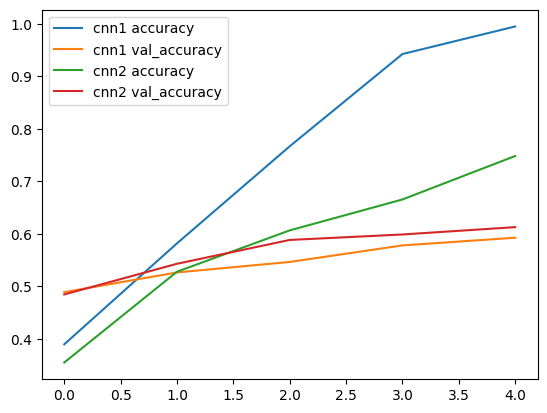

In [58]:
# plot accuracy for the first CNN model
plt.plot(cnn_h.history['accuracy'], label='cnn1 accuracy')
plt.plot(cnn_h.history['val_accuracy'], label='cnn1 val_accuracy')

# plot accuracy for the second CNN model
plt.plot(cnn2_h.history['accuracy'], label='cnn2 accuracy')
plt.plot(cnn2_h.history['val_accuracy'], label='cnn2 val_accuracy')

plt.legend(loc='best')
plt.show()